In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
df_test = pd.read_csv('data/loan_sanction_test.csv')
df_train = pd.read_csv('data/loan_sanction_train.csv')

In [7]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(5))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_train)

##################### Shape #####################
(614, 13)
##################### Types #####################
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
##################### Head #####################
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantInco

## Data cleaning

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

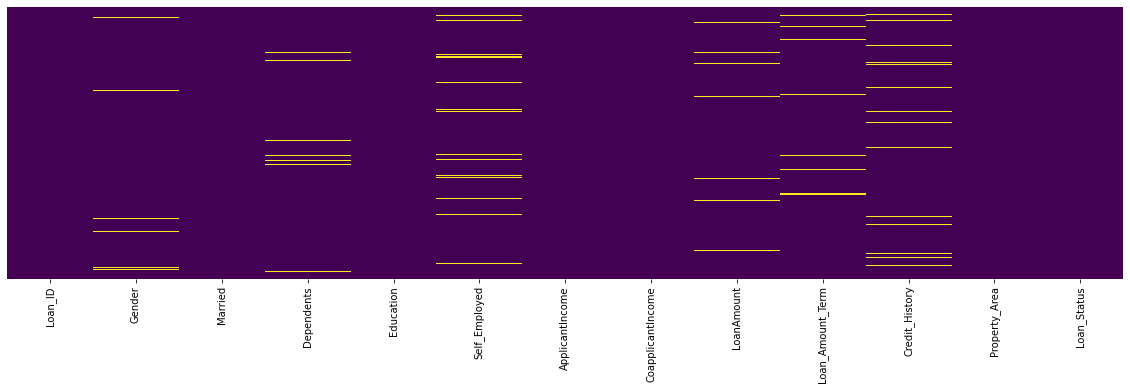

In [9]:
#plotout columns with missing data
plt.figure(figsize=(20,5))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.plot

In [24]:
#column names to lower case
df_train.columns = df_train.columns.str.lower()
df_train.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [26]:
df_train.self_employed.value_counts()

No     500
Yes     82
Name: self_employed, dtype: int64

In [27]:
df_train.credit_history.value_counts()

1.0    475
0.0     89
Name: credit_history, dtype: int64

In [28]:
df_train.loan_amount_term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: loan_amount_term, dtype: int64

In [29]:
df_train.loanamount.value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: loanamount, Length: 203, dtype: int64

In [31]:
df_train.dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: dependents, dtype: int64

In [32]:
df_train.gender.value_counts()

Male      489
Female    112
Name: gender, dtype: int64

In [33]:
#Find the total number of missing values from the entire dataset
df_train.isnull().sum().sum()

149

### Filling out missing data
For categorical columns, we shall use mode to fillout all missing values

In [36]:
#Replace the missing values for categorical columns with mode
df_train['gender'] = df_train['gender'].fillna(df_train['gender'].mode()[0])
df_train['married'] = df_train['married'].fillna(df_train['married'].mode()[0])
df_train['self_employed'] = df_train['self_employed'].fillna(df_train['self_employed'].mode()[0])
df_train.isnull().sum()

loan_id               0
gender                0
married               0
dependents           15
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

For numerical columns, we have to first do outlier analysis. for columns with outliers we use medium of the series to fill out missing data and for data with no outliers we use mean